# Artificial Neural Network for 2D Binary Classification

In [1]:
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

## Toy Example: 2D Binary Classification
Generate a 2D Toy Data Set

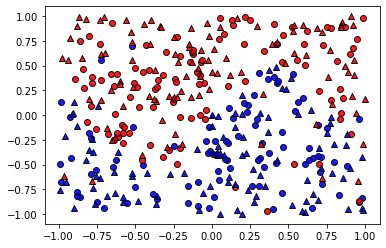

In [2]:
np.random.seed(100)

N = 400
x = 2 * (np.random.rand(N,2) - 0.5)

# XOR function
#y = (x[:,0] > 0)^(x[:,1] > 0)

# Checkboard
#y = (np.mod(np.round(x[:,0]*2),2) == 0)^(np.mod(np.round(x[:,1]*2),2) == 0)

# Circle
#y = (x[:,0] ** 2 + x[:,1] ** 2 > 0.25)

# Sine function
y = (x[:,1] > 0.5*np.sin(4*x[:,0]))

# Add noise in the label
for i in range(round(N*0.1)):
    y[np.random.randint(0,N-1)] = 1 - y[np.random.randint(0,N-1)]

def plot2Ddata(X_train,X_test,y_train,y_test):
    plt.scatter(X_train[y_train == 0,0],X_train[y_train == 0,1],
                color='b',marker='o',alpha=0.9,edgecolors='k')
    plt.scatter(X_train[y_train == 1,0],X_train[y_train == 1,1],
                color='r',marker='o',alpha=0.9,edgecolors='k')
    plt.scatter(X_test[y_test == 0,0],X_test[y_test == 0,1],
                color='b',marker='^',alpha=0.9,edgecolors='k')
    plt.scatter(X_test[y_test == 1,0],X_test[y_test == 1,1],
                color='r',marker='^',alpha=0.9,edgecolors='k')

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

plot2Ddata(X_train,X_test,y_train,y_test)

## Create Binary Classifier MLP class

In [3]:
class BinaryClassifierMLP:
    def __init__(self, input_size, hidden_size, output_size):
         # Initialize weights and biases for the hidden layer and output layer
        self.weights_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def cross_entropy_loss(self, y, y_pred):
        return -(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))

    def forward(self, inputs):
        # Forward propagation
        self.hidden_input = np.dot(inputs, self.weights_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        self.output_layer_input = np.dot(self.hidden_output, self.weights_output) + self.bias_output
        self.output = self.sigmoid(self.output_layer_input)
        return self.output

    def backward(self, inputs, targets, learning_rate):
        # Backpropagation and Stochastic Gradient Descent
        batch_loss = 0
        
        for i in range(len(inputs)):
            # Single data point forward and backward pass
            input_data = np.array([inputs[i,:]])
            target_data = targets[i]

            # Forward pass
            self.forward(input_data)

            # Backward pass
            output_error = self.output - target_data
            hidden_error = output_error.dot(self.weights_output.T) * self.sigmoid_derivative(self.hidden_output)
            
            # Update weights and biases using Stochastic Gradient Descent
            self.weights_output -= learning_rate * self.hidden_output.T.dot(output_error)
            self.bias_output -= learning_rate * np.sum(output_error, axis=0, keepdims=True)
            self.weights_hidden -= learning_rate * input_data.T.dot(hidden_error)
            self.bias_hidden -= learning_rate * np.sum(hidden_error, axis=0, keepdims=True)
            
            # Add to the batch loss function
            batch_loss += self.cross_entropy_loss(target_data, self.output)
            
        return batch_loss / len(inputs)
    
    def plot_decision(self, inputs, targets):
        nx, ny = 200, 200
        xv, yv = np.meshgrid(np.linspace(-1,1,nx), 
                             np.linspace(-1,1,ny))
        zv = np.zeros(xv.shape)
        for i in range(nx):
            for j in range(ny):
                zv[i,j] = self.forward(np.array([xv[i,j], yv[i,j]]))

        plt.figure(figsize=(6,4))
        plt.contourf(xv, yv, zv, cmap=cm.bwr)
        plt.scatter(inputs[targets == 0,0],inputs[targets == 0,1],
                color='b',marker='o',alpha=0.9,edgecolors='k')
        plt.scatter(inputs[targets == 1,0],inputs[targets == 1,1],
                color='r',marker='o',alpha=0.9,edgecolors='k')
        plt.show()

    def train(self, inputs, targets, epochs, learning_rate):
        for epoch in range(epochs):
            # Backpropagation algorithm
            batch_loss = self.backward(inputs, targets, learning_rate)

            # Print the loss for every 1000 epochs
            if (epoch+1) % 1000 == 0 or epoch == 0:
                print(f'Epoch {epoch+1}, Training Loss: {batch_loss}')
                self.plot_decision(inputs, targets)
    
    def predict(self, input_data):
        return np.round(self.forward(input_data))

## Train the Neural Net

Epoch 0, Training Loss: [[0.86559313]]


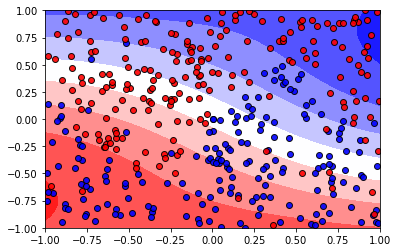

Epoch 1000, Training Loss: [[0.24145756]]


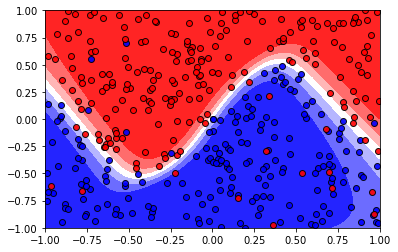

Epoch 2000, Training Loss: [[0.23042519]]


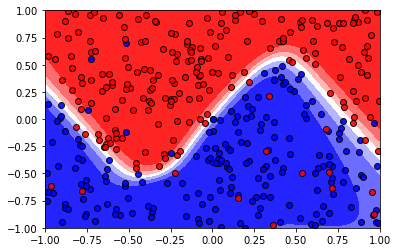

Epoch 3000, Training Loss: [[0.22613199]]


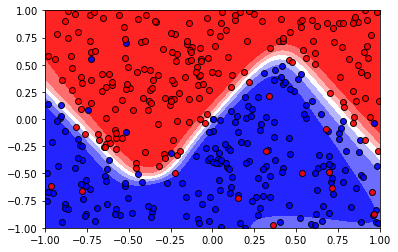

Epoch 4000, Training Loss: [[0.22335478]]


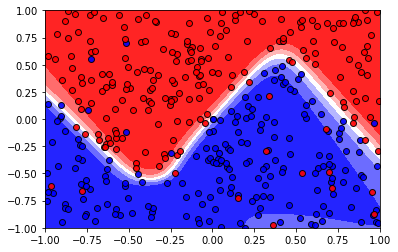

Epoch 5000, Training Loss: [[0.2212141]]


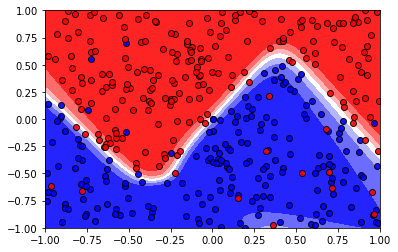

Epoch 6000, Training Loss: [[0.21793703]]


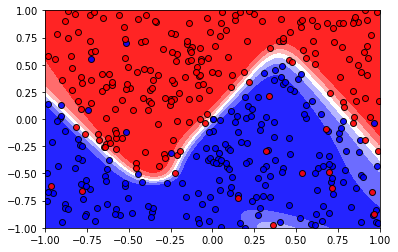

Epoch 7000, Training Loss: [[0.21214488]]


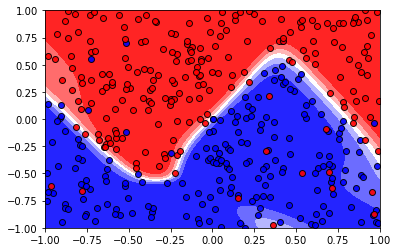

Epoch 8000, Training Loss: [[0.20641702]]


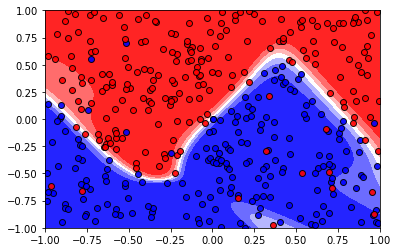

Epoch 9000, Training Loss: [[0.20068286]]


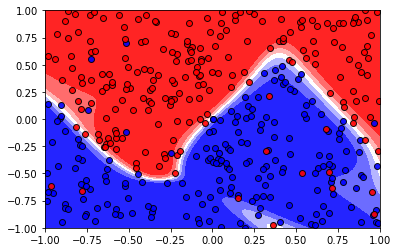

In [4]:
# Define your input, target, and parameters
input_size = 2
hidden_size = 10
output_size = 1
learning_rate = 0.01
epochs = 10000

# Create an instance of BinaryClassifierMLP
mlp = BinaryClassifierMLP(input_size, hidden_size, output_size)

# Train the binary classifier
mlp.train(x, y, epochs, learning_rate)

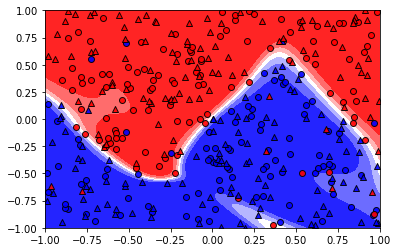

In [5]:
nx, ny = 200, 200
xv, yv = np.meshgrid(np.linspace(-1,1,nx), 
                     np.linspace(-1,1,ny))
zv = np.zeros(xv.shape)
for i in range(nx):
    for j in range(ny):
        zv[i,j] = mlp.forward(np.array([xv[i,j], yv[i,j]]))

plt.figure(figsize=(6,4))
plt.contourf(xv, yv, zv, cmap=cm.bwr)
plot2Ddata(X_train,X_test,y_train,y_test)
plt.show()

In [6]:
y_train_pred = np.zeros(y_train.shape)
for i in range(len(y_train)):
    y_train_pred[i] = mlp.predict(X_train[i,:])

print("Performance on Training Set")
print(f'  Total no. of training samples: {len(y_train)}')
TP = np.sum(y_train_pred * y_train)
TN = np.sum((1 - y_train_pred) * (1 - y_train))
FP = np.sum((1 - y_train_pred) * y_train)
FN = np.sum(y_train_pred * (1 - y_train))
print(f'  True Positive: {TP}')
print(f'  True Negative: {TN}')
print(f'  False Positive: {FP}')
print(f'  False Negative: {FN}')
print(f'  Accuracy: {(TP + TN)/len(y_train)}')

y_test_pred = np.zeros(y_test.shape)
for i in range(len(y_test)):
    y_test_pred[i] = mlp.predict(X_test[i,:])

print("Performance on Test Set")
print(f'  Total no. of test samples: {len(y_test)}')
TP = np.sum(y_test_pred * y_test)
TN = np.sum((1 - y_test_pred) * (1 - y_test))
FP = np.sum((1 - y_test_pred) * y_test)
FN = np.sum(y_test_pred * (1 - y_test))
print(f'  True Positive: {TP}')
print(f'  True Negative: {TN}')
print(f'  False Positive: {FP}')
print(f'  False Negative: {FN}')
print(f'  Accuracy: {(TP + TN)/len(y_test)}')

Performance on Training Set
  Total no. of training samples: 200
  True Positive: 100.0
  True Negative: 87.0
  False Positive: 8.0
  False Negative: 5.0
  Accuracy: 0.935
Performance on Test Set
  Total no. of test samples: 200
  True Positive: 94.0
  True Negative: 95.0
  False Positive: 8.0
  False Negative: 3.0
  Accuracy: 0.945
